## Section II: Data Analysis of SP500

According to Wikipeida, "the SP500 is a stock market index that tracks the stocks of 500 large-cap U.S. companies. It represents the stock market's performance by reporting the risks and returns of the biggest companies. Investors use it as the benchmark of the overall market, to which all other investments are compared."

This notebook evaluates various aspects of the price history of the SP500; looking for trends, randomness and statistics.

In [17]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from pandas.plotting import bootstrap_plot
import matplotlib.pyplot as plt

plt.close('all')



### SP500 Preprocessing

The initial pickle file is a multi indexed dataframe. By reducing the index to 1D, dropping columns and limiting the data range, this is what the models will be trained on.

In [2]:
import pandas as pd
df = pd.read_pickle("sp500.pickle")

print("Df shape is : {}".format(df.shape))
for name in df.columns:
    print(name)

Df shape is : (2284, 24)
Prior
Open
High
Low
Close
Volume
Prior_Close
Prior_Open
Open_Close
High_Low
Prior_Open+
Open_Close+
High_Low+
DJI
DJI+
COMP
COMP+
VIX
VIX+
GLD
GLD+
Target
Target_
Target+


In [3]:
df[['Open', 'High', 'Low', 'Close', 'Volume']].tail(5)

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098,1.724367e+09
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951,2.731627e+09
2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078,2.552055e+09
2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990,2.209846e+09
2018-12-31,2498.939941,2509.239990,2482.820068,2506.850098,1.998138e+09


### SP500 Closing Price 

A simple graph showing the Close price over time. Clearly the price tends to migrate upwards for most years.

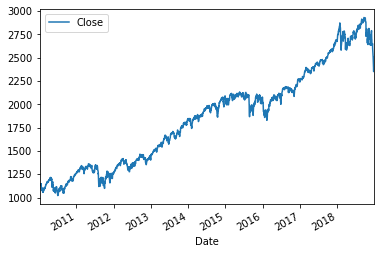

In [4]:
df[['Close']].plot()

### SP500 Closing Price Percentage Change

Even through the price tends upwards, day in day out the SP500 closing price only changes by a couple of percent.

Prior to Close % change mean: 0.03990185260772705
Prior to Close % change stddev: 0.9401460886001587


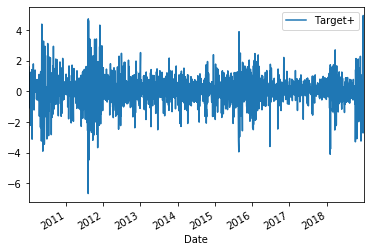

In [5]:
print("Prior to Close % change mean: {}".format(df['Target+'].mean()))
print("Prior to Close % change stddev: {}".format(df['Target+'].std()))
df[['Target+']].plot()


## Absolute Close Price - Non Stationary Test

### Adfuller Statistical Test
The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation. Source: Statsmodels documentation

If the p-value is above 0.05 and the AFD statistic is below the 1% cutoff, that is a very strong indication that the series is non-stationary; effectively changing over time.


In [6]:
# statistical test
result = adfuller(df['Target'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -0.850097
p-value: 0.803962
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


### Lag Plot
Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random. Source: Pandas Documentation

Even a lag of 10 time steps or days, shows a clear structure.

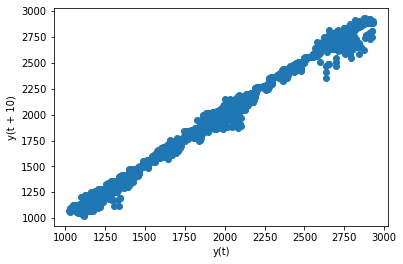

In [7]:
lag_plot(df['Target'], lag=10)

### Autocorrelation Plot
his is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. Source: Pandas Documentation

Again, there is a clear non-randomness property to the closing price.

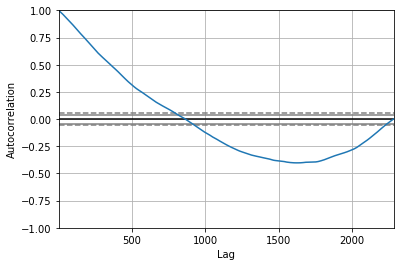

In [8]:
autocorrelation_plot(df['Target'])

## Percent Change in Close Price - Non Stationary Test

### Density Plot of Prior to Close Percent Change

Determining the breakdown of percent price changes the close, it is possible to gain insight into what biases may exist. From the two plots below, the price change is slightly biased towards the positive as per the mean and median. However, the midrage value is below zero, indicating that when the market turns negative, it tends to drop more. The premise to draw upon here is that markets fall faster than they rise.

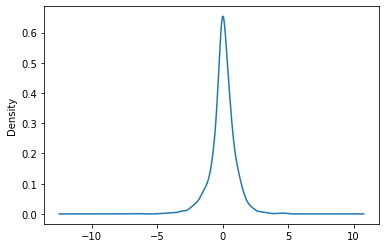

In [9]:
df['Target+'].plot.kde()


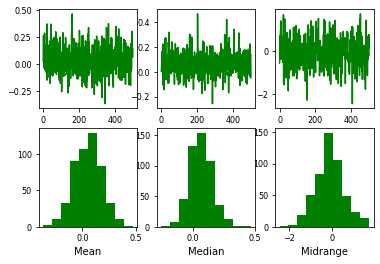

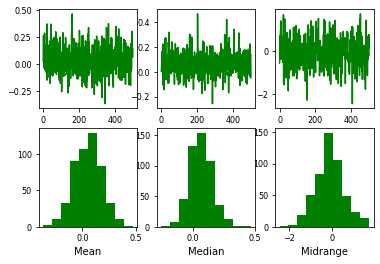

In [10]:
bootstrap_plot(df['Target+'], size=50, samples=500, color='green')

The ADF score is below the 10% cutoff and the p score zero, clearly a stationary series.

In [11]:
# statistical test
result = adfuller(df['Target+'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -23.979824
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


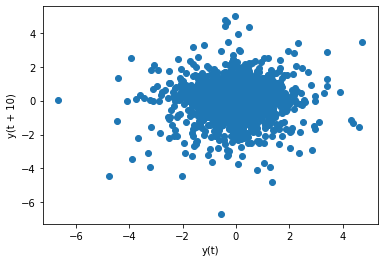

In [12]:
lag_plot(df['Target+'], lag=10)

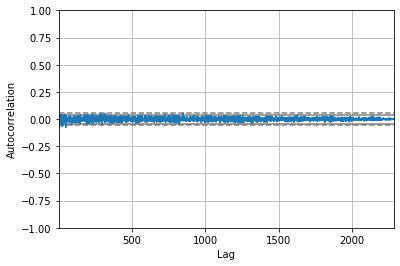

In [13]:
autocorrelation_plot(df['Target+'])

## Close Price Net Change - Stationary Test

In [14]:
# statistical test
result = adfuller(df['Prior_Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.363177
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


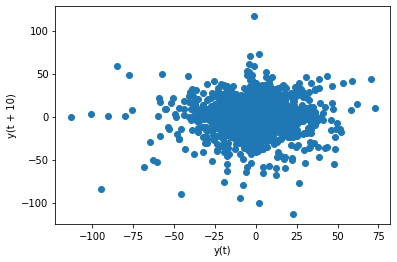

In [15]:
lag_plot(df['Prior_Close'], lag=10)

In [ ]:
autocorrelation_plot(df['Prior_Close'])